# Implementazione di un classificatore con Logistic Regression

### 0) Importo le librerie necessarie

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

### 1) Sigmoid o Logistic function
Per effettuare la classificazione serve una funzione con codominio [0,1]. Infatti la predizione si baserà sulla probabilità della stima di appartenere ad una o all'altra classe

In [63]:
def logistic(z):
    den = 1 + np.exp(-z)
    sigm = 1.0/den
    return sigm

### 2) Funzione di ipotesi
Per approssimare una probabilità, la funzione di costo sarà basta sulla funzione logisitca

In [64]:
def hyp(W,X):
    param = np.dot(W,X.T)
    return logistic(param)

### 3) Funzione di costo
Da massimizzare nello step di ottimizzazione. IN particolare il logaritmo della funzione di coston

In [65]:
def cost(W,X,Y):
    m = X.shape[0]
    h = hyp(W,X)
    log_h = np.log(h)
    log_one_h = np.log(1-h)
    l_cost = float((-1.0/m) * ((np.dot(log_h,Y)) + (np.dot(log_one_h,(1-Y)))))
    return l_cost

### 4) Carico e preparo i dati

In [66]:
# Carico il dataset
path = '../color_extr/data.csv'
data = pd.read_csv(path, usecols = [i for i in range(5)])

# Creo train e test set
X_train, X_test, Y_train, Y_test = train_test_split(data[['presenza_foglie','assenza_foglie','presenza_bachi_sfondo','assenza_bachi_sfondo']], data[['classificazione']], test_size=0.23)

m_tr, n_tr = X_train.shape
X_train = np.concatenate((np.ones((m_tr,1)), X_train), axis=1)
n_tr +=1

m_te, n_te = X_test.shape
X_test = np.concatenate((np.ones((m_te,1)), X_test), axis=1)
n_te += 1

W = np.array(np.zeros((1,n_te)))
#W = np.matrix(np.random.randn((n_te)))

Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

# Normalizzo i dati
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### 5) Fit dell'algoritmo con gradient ascent
Cerco il punto di massimo della funzione di costo per trovare i pesi ottimi

In [68]:
def gradient_ascent(X,W,Y,alpha,stop):
    m,n = X.shape
    cost_old = np.inf
    cost_new = cost(W,X,Y)
    print(cost_old - cost(W,X,Y))
    sum = 0
    iter = 0

    while(abs(cost_old-cost_new) > stop):
        for j in range(0,n):
            for i in range(0,m):
                sum += (Y[i][0] - hyp(W,X[i])) * X[i][j]
            W[0][j] = W[0][j] + (alpha/m) * sum
        cost_old = cost_new
        cost_new = cost(W,X,Y)
        print(cost_old - cost(W,X,Y))
        iter += 1

    print(W)
    return iter  

gradient_ascent(X_train,W,Y_train,0.04,0.00001)

inf
0.00097938356091673
0.0009668170750017913
0.0009544991067892417
0.0009424230883309792
0.0009305826670229778
0.0009189716972388684
0.0009075842323382766
0.0008964145170279603
0.0008854569800611778
0.0008747062272558281
0.0008641570348182637
0.0008538043429555386
0.0008436432497634927
0.000833669005376958
0.0008238770063690726
0.0008142627903881816
0.0008048220310208909
0.0007955505328706147
0.0007864442268410432
0.0007774991656155361
0.0007687115193228677
0.0007600775713805241
0.000751593714508253
0.000743256446902818
0.0007350623685669633
0.0007270081777868143
0.0007190906677484177
0.0007113067232902837
0.0007036533177829096
0.0006961275101317332
0.0006887264418969086
0.0006814473345252703
0.0006742874866893234
0.0006672442717284011
0.0006603151351884939
0.0006534975924547826
0.0006467892264747366
0.0006401876855666178
0.0006336906813103338
0.0006272959865169514
0.000621001433273427
0.000614804911059974
0.0006087043649362633
0.0006026977937939326
0.0005967832486729885
0.00059095883

1691

### 6) Model Assestement

In [69]:
def prediction(W,X,Y):
    m = X.shape[0]
    h = hyp(X, W)
    Y_hat = h > 0.6
    accuracy = 1.0/m * np.sum(Y == Y_hat)
    return accuracy, Y_hat, h

Y_hat_prob = prediction(W,X_test,Y_test)[2]

print("### MyLog:\n\tAccuracy of training: "+str(prediction(W,X_train,Y_train)[0])+"\n\tAccuracy of test: "+str(prediction(W,X_test,Y_test)[0]))
print("### MyLog:\n\tError rate of training: "+str(1 - prediction(W,X_train,Y_train)[0])+"\n\tError rate of test: "+str(1 - prediction(W,X_test,Y_test)[0]))

### MyLog:
	Accuracy of training: 0.9759615384615385
	Accuracy of test: 0.9839228295819935
### MyLog:
	Error rate of training: 0.024038461538461453
	Error rate of test: 0.016077170418006492


#### - Metrica errore

In [70]:
metric_error = len(data[data.classificazione == 0]) / len(data)
metric_accurancy = 1 - metric_error

(metric_error,metric_accurancy)

(0.44041450777202074, 0.5595854922279793)

#### - Confusion Matrix

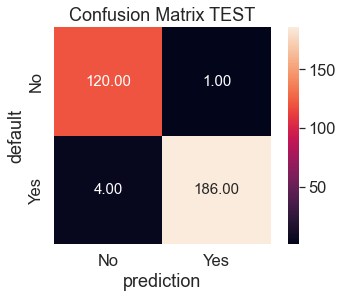

In [71]:
predictions = prediction(W,X_test,Y_test)[1]

cm = confusion_matrix(Y_test, predictions)
plt.figure()
sns.set(font_scale=1.5)
hm = sns.heatmap( cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=['No', 'Yes'], xticklabels=['No', 'Yes'])
plt.title('Confusion Matrix TEST')
plt.ylabel('default')
plt.xlabel('prediction')
plt.show()

#### - Precision e Recall Curve

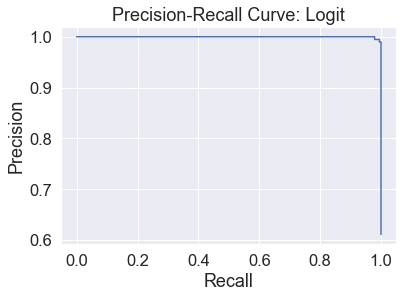

Precision:  0.6129032258064516
Recall:  1.0
f1-score:  0.9867374005305041


In [72]:
precision, recall, thresholds = precision_recall_curve(Y_test, Y_hat_prob)
plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve: Logit")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print("Precision: ", precision[1])
print("Recall: ", recall[1])
print("f1-score: ", f1_score(Y_test, predictions))

#### - ROC e AUC curve

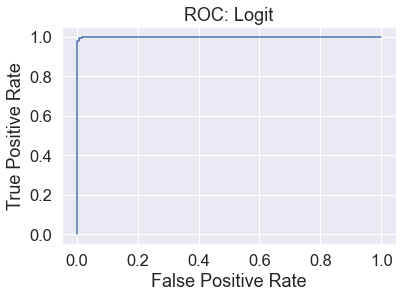

AUC:  0.9853414528055676


In [73]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_hat_prob)
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC: Logit")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print ("AUC: ", roc_auc_score(Y_test, predictions))

- Learning curves

Creo un oggetto che astrae la logistic regression per usare learning_curves di sklearn

Plot learning curve

Lib

[ 93 304 514 725 936]
***************
[[1.         0.98924731 0.98924731 0.98924731 0.98924731 0.98924731
  0.98924731 0.98924731 0.98924731 0.98924731]
 [0.99013158 0.98684211 0.99013158 0.99013158 0.99013158 0.99013158
  0.99013158 0.99013158 0.99013158 0.99013158]
 [0.9844358  0.98249027 0.98638132 0.98832685 0.98249027 0.9922179
  0.9922179  0.9922179  0.9922179  0.9922179 ]
 [0.98482759 0.98068966 0.98482759 0.98344828 0.98068966 0.99034483
  0.9862069  0.98344828 0.9862069  0.9862069 ]
 [0.98717949 0.98397436 0.98611111 0.98611111 0.98397436 0.99038462
  0.98717949 0.98397436 0.98504274 0.98717949]]
***************
[[0.99038462 1.         0.96153846 0.97115385 0.99038462 0.97115385
  0.96153846 0.98076923 0.99038462 0.97115385]
 [0.99038462 1.         0.98076923 0.99038462 1.         0.95192308
  0.98076923 0.99038462 0.98076923 0.98076923]
 [0.99038462 1.         0.98076923 0.98076923 1.         0.95192308
  0.98076923 1.         0.99038462 0.99038462]
 [0.99038462 1.         0.

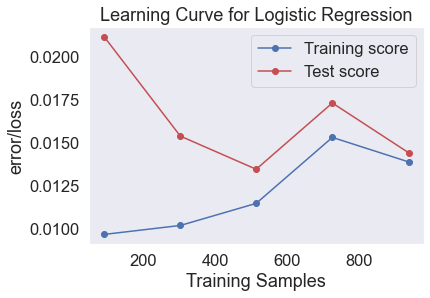

In [74]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

model_lr = LogisticRegression()
lr = model_lr.fit(X_train, Y_train)
predictions_lr = model_lr.predict(X_test)
predictions_lr_scores = model_lr.predict_proba(X_test)[:,1]

train_size, train_score, test_score = learning_curve(estimator=model_lr, X=X_train, y=Y_train, cv=10, scoring = None )

print(train_size)
print("***************")
print(train_score)
print("***************")
print(test_score)

train_loss_m = 1 - np.mean(train_score, axis=1)
test_loss_m = 1- np.mean(test_score, axis=1)

plt.plot(train_size, train_loss_m, 'o-', color="b")
plt.plot(train_size, test_loss_m, 'o-', color="r")
plt.legend(('Training score', 'Test score'), loc='best')
plt.xlabel("Training Samples")
plt.ylabel("error/loss")
plt.title("Learning Curve for Logistic Regression")
plt.grid()

plt.show()

inf
0.012883122471923691
0.012450163142203596
0.012032314740381134
0.011629341722276143
0.011240968461929568
0.010866885162122975
0.01050675346336849
0.010160211699775212
0.009826879766296814
0.00950636357615886
0.009198259099488904
0.008902155984440996
0.008617640770352986
0.008344299708937908
0.008081721214291404
0.007829497965842203
0.007587228690475234
0.0073545196511122235
0.007130985869273854
0.006916252108700172
0.006709953646172273
0.006511736854381722
0.006321259620125419
0.0061381916194130914
0.005962214469279692
0.005793021774293139
0.0056303190839880335
0.0054738237757324115
0.005323264875932376
0.005178382830954897
0.005038929237750289
0.004904666542876468
0.004775367717455958
0.004650815914549078
0.004530804114483533
0.004415134762846551
0.004303619405101378
0.004196078321138219
0.004092340162504093
0.003992241594550916
0.0038956269453169767
0.003802347862582378
0.003712262980218206
0.0036252375946796978
0.0035411433522611335
0.0034598579475312863
0.003381264833210218
0.0

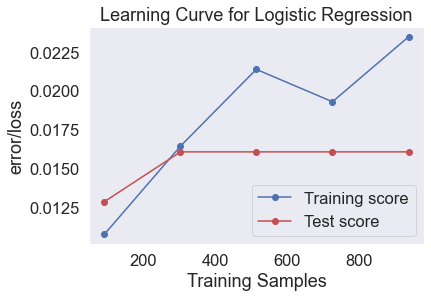

In [76]:
train_size = [93,304,514,725,936]
chunk = 10
train_score = []
test_score = []

for s in train_size:
    tr_s = []
    te_s = []
    
    X_tr = X_train[0:s]
    Y_tr = Y_train[0:s]
    W_lc = np.array(np.zeros((1,5)))

    gradient_ascent(X_tr,W_lc,Y_tr,0.04,0.00001)

    for e in np.array_split(X_tr, chunk):
        tr_s.append(prediction(W_lc,X_tr,Y_tr)[0])
        te_s.append(prediction(W_lc,X_test,Y_test)[0])

    train_score.append(tr_s)
    test_score.append(te_s)

train_loss_m = 1 - np.mean(train_score, axis=1)
test_loss_m = 1 - np.mean(test_score, axis=1)

print(train_size)
print("***************")
print(train_score)
print("***************")
print(test_score)

plt.plot(train_size, train_loss_m, 'o-', color="b")
plt.plot(train_size, test_loss_m, 'o-', color="r")
plt.legend(('Training score', 'Test score'), loc='best')
plt.xlabel("Training Samples")
plt.ylabel("error/loss")
plt.title("Learning Curve for Logistic Regression")
plt.grid()

plt.show()